In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = pd.Series(np.arange(5,10)) # array >> Series
x

0    5
1    6
2    7
3    8
4    9
dtype: int32

In [3]:
xx = pd.Series([5,6,7,8,9]) # list >> Series
xx

0    5
1    6
2    7
3    8
4    9
dtype: int64

 #### Operator

In [4]:
x.sum()

35

In [5]:
x.cumsum()

0     5
1    11
2    18
3    26
4    35
dtype: int32

In [6]:
xx.diff()

0    NaN
1    1.0
2    1.0
3    1.0
4    1.0
dtype: float64

In [7]:
y = pd.Series(np.arange(15,20),
              index = np.vectorize(chr)(np.arange(65,70)))
y

A    15
B    16
C    17
D    18
E    19
dtype: int32

In [8]:
x+y

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
A   NaN
B   NaN
C   NaN
D   NaN
E   NaN
dtype: float64

In [9]:
samsung = {'name' : 'samsung', 'beta' : 1.35 , 'realized_return' : 0.09}
s1 = pd.Series(samsung)
s1

name               samsung
beta                  1.35
realized_return       0.09
dtype: object

 #### apply : 원소들에게 각각 함수를 적용해서 return한다.

In [10]:
def isnumber(x) :
    if type(x) == int or type(x) ==float :
        return 1
    else :
        return 0

In [11]:
s1.apply(isnumber)

name               0
beta               1
realized_return    1
dtype: int64

 #### Series는 iloc이나 숫자 인덱싱 모두 가능합니다.


In [12]:
s1.iloc[1:]

beta               1.35
realized_return    0.09
dtype: object

In [13]:
s1[1:]

beta               1.35
realized_return    0.09
dtype: object

In [14]:
Z = pd.Series(np.random.normal(0,5,size = 5).round(3), 
              index = np.vectorize(chr)(np.arange(65,70)))
Z

A    3.071
B    0.297
C   -4.102
D   -9.724
E   -4.087
dtype: float64

 #### pd.concat 두 시리즈 합치기

In [15]:
temp = pd.Series(np.repeat([np.nan],3), index = np.arange(3))
temp2 = pd.Series(temp,index = np.arange(4,8))
temp3 = pd.concat([temp,Z,temp2],axis =0)
temp3

0      NaN
1      NaN
2      NaN
A    3.071
B    0.297
C   -4.102
D   -9.724
E   -4.087
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

 #### isna

In [16]:
temp3.isna()

0     True
1     True
2     True
A    False
B    False
C    False
D    False
E    False
4     True
5     True
6     True
7     True
dtype: bool

 #### conditioning

In [17]:
temp3[temp3.isna() == False]

A    3.071
B    0.297
C   -4.102
D   -9.724
E   -4.087
dtype: float64

 #### fillna method

In [18]:
X1 = temp3.fillna(0)
X2 = temp3.fillna(method = 'ffill')
X3 = temp3.fillna(method = 'bfill')
pd.concat([X1,X2,X3],axis=1)

0      1      2
0  0.000    NaN  3.071
1  0.000    NaN  3.071
2  0.000    NaN  3.071
A  3.071  3.071  3.071
B  0.297  0.297  0.297
C -4.102 -4.102 -4.102
D -9.724 -9.724 -9.724
E -4.087 -4.087 -4.087
4  0.000 -4.087    NaN
5  0.000 -4.087    NaN
6  0.000 -4.087    NaN
7  0.000 -4.087    NaN

In [19]:
XX1 = temp3.fillna(0, limit = 2)
XX2 = temp3.fillna(method  = 'ffill', limit = 2)
XX3 = temp3.fillna(method = 'bfill', limit = 2)
pd.concat([XX1,XX2,XX3],axis = 1)

0      1      2
0  0.000    NaN    NaN
1  0.000    NaN  3.071
2    NaN    NaN  3.071
A  3.071  3.071  3.071
B  0.297  0.297  0.297
C -4.102 -4.102 -4.102
D -9.724 -9.724 -9.724
E -4.087 -4.087 -4.087
4    NaN -4.087    NaN
5    NaN -4.087    NaN
6    NaN    NaN    NaN
7    NaN    NaN    NaN

  #### Indexing with condition

In [20]:
temp3[temp3>2]

A    3.071
dtype: float64

In [21]:
temp3[['A','B','C']]

A    3.071
B    0.297
C   -4.102
dtype: float64

 #### pd.to_datetime

In [22]:
dr = ['2020-01-01','2020-02-01','2020-03-01']
pd.to_datetime(dr)

DatetimeIndex(['2020-01-01', '2020-02-01', '2020-03-01'], dtype='datetime64[ns]', freq=None)

 #### pd.date_range

In [23]:
dr = pd.date_range('2010-01-01','2010-12-31',freq = 'M')
pd.Series(dr).head()

0   2010-01-31
1   2010-02-28
2   2010-03-31
3   2010-04-30
4   2010-05-31
dtype: datetime64[ns]

In [24]:
start_day = pd.to_datetime('2010-01-01')
pd.Series(dr).apply(lambda x : (x - start_day).days ).head()

0     30
1     58
2     89
3    119
4    150
dtype: int64

In [25]:
pd.Series(dr).diff().head()

0       NaT
1   28 days
2   31 days
3   30 days
4   31 days
dtype: timedelta64[ns]

In [26]:
pd.Series(dr).diff().apply(lambda x : x.days).head()

0     NaN
1    28.0
2    31.0
3    30.0
4    31.0
dtype: float64

 문제 1. 현재 시점은 2010년 12월 31일이다. 만기 1년 채권의 쿠폰 이자율이 연 5%로 쿠폰이자는 매 월 말에 지급할 때, 액면가가 10,000인 쿠폰채의 매 월의 이자지급금액을 계산하시오. 매 월의 엄밀한 Day 숫자를 감안하여 가치를 계산하세요. (1년은 365일로 가정한다. 매 월의 기간을 1/12로 계산하지 말고 엄밀하게 계산하시오.)

In [27]:
#############################
##풀이과정을 여기에 쓰세요 ##
#############################
c , FV = 0.05 , 10000
dr = pd.date_range('2010-12-31','2011-12-31',freq = 'M')
days_of_year =365 
DeltaT = pd.Series(dr).diff().apply(lambda x : x.days).fillna(0)/days_of_year
FV * c * DeltaT
#############################

0      0.000000
1     42.465753
2     38.356164
3     42.465753
4     41.095890
5     42.465753
6     41.095890
7     42.465753
8     42.465753
9     41.095890
10    42.465753
11    41.095890
12    42.465753
dtype: float64

 #### interpolate method

In [28]:
data1 = np.random.uniform(0,30,5).round(2)
data2 = np.repeat([np.nan],3)
data3 = np.random.uniform(15,30,5).round(2)
data = np.concatenate([data1,data2,data3])
DF = pd.DataFrame(data,
                  index = pd.date_range('2010-01-01','2010-01-13', freq = 'D'))

In [29]:
lin_polate = DF.interpolate(method = 'linear')
cub_polate = DF.interpolate(method = 'cubic')
pd.concat([DF.rename(columns = {0 : 'before'}),
           lin_polate.rename(columns = {0 : 'after(linear)'})],
           axis = 1).iloc[3:10]

before  after(linear)
2010-01-04    5.93         5.9300
2010-01-05   18.71        18.7100
2010-01-06     NaN        20.5225
2010-01-07     NaN        22.3350
2010-01-08     NaN        24.1475
2010-01-09   25.96        25.9600
2010-01-10   19.69        19.6900

In [30]:
pd.concat([DF.rename(columns = {0 : 'before'}),
           cub_polate.rename(columns = {0 : 'after(cubic)'})],
           axis = 1).iloc[3:10]

before  after(cubic)
2010-01-04    5.93      5.930000
2010-01-05   18.71     18.710000
2010-01-06     NaN     29.737581
2010-01-07     NaN     33.715922
2010-01-08     NaN     32.003802
2010-01-09   25.96     25.960000
2010-01-10   19.69     19.690000

 #### Resample

In [31]:
dateindex = pd.date_range('2010-01-01','2010-09-30',freq= 'Q')
r = pd.Series(np.linspace(0.02,0.05,len(dateindex)) , index = dateindex)
r.resample('M').last()

2010-03-31    0.020
2010-04-30      NaN
2010-05-31      NaN
2010-06-30    0.035
2010-07-31      NaN
2010-08-31      NaN
2010-09-30    0.050
Freq: M, dtype: float64

In [32]:
r.resample('M').last().interpolate(method = 'linear')

2010-03-31    0.020
2010-04-30    0.025
2010-05-31    0.030
2010-06-30    0.035
2010-07-31    0.040
2010-08-31    0.045
2010-09-30    0.050
Freq: M, dtype: float64

 문제 2-1. 연속복리의 제로금리와 만기가 다음과 같이 주어진다.제로금리를 월별로 Cubic Interpolation하시오. (2020-05-31, 2020-06-30, .......등)
 
 문제 2-2. 현재시점은 2020년 5월 11일이다. 매 월 말의 제로금리를 사용하여, 2020년 5월 31일부터 2028년 1월 31일까지 한 달 간격으로 (2020-05-31, 2020-06-30, 2020-07-31 .... 2028-01-31)해당 만기에 해당하는 제로쿠폰채의 현재가치를 계산하시오. 매 월의 Day count는 엄밀하게 계산하며 1년은 365일로 가정하시오.

|만기|제로금리|
|------|---|
| '2020-05-12'|1.713 |
| '2020-06-17'|1.673 |
| '2020-09-16'|1.622 |
| '2020-12-16'|1.567 |
| '2021-03-17'|1.522 |
| '2021-06-16'|1.481 |
| '2021-09-15'|1.448 |
| '2022-02-14'|1.430 |
| '2023-02-13'|1.383 |
| '2024-02-12'|1.376 |
| '2025-02-12'|1.388 |
| '2026-02-12'|1.409 |
| '2027-02-12'|1.434 |
| '2028-02-14'|1.46 |


In [33]:
start_day = pd.to_datetime('2020-05-11')
Zero_Rate = [1.713,1.673,1.622,1.567,1.522, 1.481,1.448,1.430,1.383,1.376,1.388,
            1.409,1.434,1.46]
Mat_Date = ['2020-05-12','2020-06-17','2020-09-16','2020-12-16','2021-03-17',
           '2021-06-16','2021-09-15','2022-02-14','2023-02-13','2024-02-12',
           '2025-02-12','2026-02-12','2027-02-12','2028-02-14']

#############################
##풀이과정을 여기에 쓰세요 ##
#############################
r = pd.Series(Zero_Rate,index= Mat_Date)/100
r.index = pd.to_datetime(r.index)
Mr = r.resample('M').last()
itp_mr = Mr.interpolate(method = 'cubic')
T = pd.Series(itp_mr.index, index = itp_mr.index).apply(lambda x : (x - start_day).days)/365
PV = np.exp(-itp_mr * T)
#############################

In [34]:
PV

2020-05-31    0.999062
2020-06-30    0.997711
2020-07-31    0.996348
2020-08-31    0.994998
2020-09-30    0.993710
                ...   
2027-10-31    0.897162
2027-11-30    0.895948
2027-12-31    0.894692
2028-01-31    0.893435
2028-02-29    0.892258
Freq: M, Length: 94, dtype: float64

  #### Indexing with condition

In [35]:
temp3[temp3>2]

A    3.071
dtype: float64

In [36]:
temp3[['A','B','C']]

A    3.071
B    0.297
C   -4.102
dtype: float64

In [37]:
np.exp(temp3 * 0.5) + np.maximum( np.log(np.abs(temp3)) , 1)

0         NaN
1         NaN
2         NaN
A    5.765650
B    2.160093
C    1.540081
D    2.282332
E    1.537386
4         NaN
5         NaN
6         NaN
7         NaN
dtype: float64

In [38]:
np.minimum(temp3,0)

0      NaN
1      NaN
2      NaN
A    0.000
B    0.000
C   -4.102
D   -9.724
E   -4.087
4      NaN
5      NaN
6      NaN
7      NaN
dtype: float64

 ### DataFrame

 #### head

In [39]:
days , number_of_stock= 250 ,5
name = np.vectorize(chr)(np.arange(65,65+number_of_stock))
S0 = 100
ret = np.random.normal(0.005,0.02,size = (days , number_of_stock)).round(3)
DF_ret = pd.DataFrame(ret, index = np.arange(1,len(ret)+1), columns = name)
DF_ret.head()

A      B      C      D      E
1  0.006  0.017 -0.017 -0.039 -0.014
2 -0.009 -0.008  0.007  0.015  0.003
3  0.004  0.026 -0.000  0.032 -0.012
4  0.020  0.015  0.030 -0.027  0.006
5 -0.005 -0.024  0.030 -0.032 -0.035

 #### columns name change and transpose

In [40]:
r0 = pd.DataFrame([0]*number_of_stock).T
r0.columns = name
simul_r = pd.concat([r0,DF_ret],axis = 0)

 #### Operator

In [41]:
S_path = S0 * (1+simul_r).cumprod(0)
S_path.head()

A           B           C           D           E
0  100.000000  100.000000  100.000000  100.000000  100.000000
1  100.600000  101.700000   98.300000   96.100000   98.600000
2   99.694600  100.886400   98.988100   97.541500   98.895800
3  100.093378  103.509446   98.988100  100.662828   97.709050
4  102.095246  105.062088  101.957743   97.944932   98.295305

 #### Percent Change

In [42]:
S_path.pct_change().head()

A      B      C      D      E
0    NaN    NaN    NaN    NaN    NaN
1  0.006  0.017 -0.017 -0.039 -0.014
2 -0.009 -0.008  0.007  0.015  0.003
3  0.004  0.026  0.000  0.032 -0.012
4  0.020  0.015  0.030 -0.027  0.006

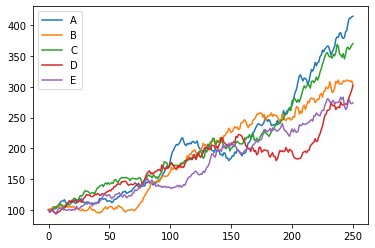

In [43]:
S_path.plot()
plt.show()

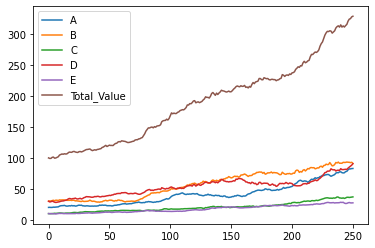

In [44]:
w = np.array([0.2, 0.3, 0.1, 0.3,0.1]).reshape(1,-1)
Port_Value = (S_path * w)
Port_Value['Total_Value'] = Port_Value.sum(axis = 1)
Port_Value.plot()
plt.show()

In [45]:
df = pd.DataFrame([[4.0, 'economics', 22],[4.1, 'economics', 23],
                  [4.2, 'economics', 24],[3.0, 'accounting', 24],
                  [3.1, 'accounting', 25],[4.3, 'mathematics', 27]],
                  columns = ['GPA', 'Major', 'Age'])
df

GPA        Major  Age
0  4.0    economics   22
1  4.1    economics   23
2  4.2    economics   24
3  3.0   accounting   24
4  3.1   accounting   25
5  4.3  mathematics   27

In [46]:
df['Major'] # 열 보기

0      economics
1      economics
2      economics
3     accounting
4     accounting
5    mathematics
Name: Major, dtype: object

In [47]:
df.iloc[0] # 행 보기

GPA              4
Major    economics
Age             22
Name: 0, dtype: object

 #### Column 추가

In [48]:
df['license'] = [5,0,2,2,4,1]
df

GPA        Major  Age  license
0  4.0    economics   22        5
1  4.1    economics   23        0
2  4.2    economics   24        2
3  3.0   accounting   24        2
4  3.1   accounting   25        4
5  4.3  mathematics   27        1

 #### 새로운 Index 추가

In [49]:
df.append({df.columns[0] : 3.2, df.columns[1] : 'mathematics',
          df.columns[2] : 22, df.columns[3] : 6}, ignore_index = True)

GPA        Major  Age  license
0  4.0    economics   22        5
1  4.1    economics   23        0
2  4.2    economics   24        2
3  3.0   accounting   24        2
4  3.1   accounting   25        4
5  4.3  mathematics   27        1
6  3.2  mathematics   22        6

 #### Transpose를 통해서 추가하여도 됩니다.

In [50]:
df_T = df.T
df_T

0          1          2           3           4            5
GPA              4        4.1        4.2           3         3.1          4.3
Major    economics  economics  economics  accounting  accounting  mathematics
Age             22         23         24          24          25           27
license          5          0          2           2           4            1

In [51]:
df_T[6] = [3.7,'economics',21,3]
df_T

0          1          2           3           4            5  \
GPA              4        4.1        4.2           3         3.1          4.3   
Major    economics  economics  economics  accounting  accounting  mathematics   
Age             22         23         24          24          25           27   
license          5          0          2           2           4            1   

                 6  
GPA            3.7  
Major    economics  
Age             21  
license          3

In [52]:
DF = df_T.T
DF

GPA        Major Age license
0    4    economics  22       5
1  4.1    economics  23       0
2  4.2    economics  24       2
3    3   accounting  24       2
4  3.1   accounting  25       4
5  4.3  mathematics  27       1
6  3.7    economics  21       3

 #### Conditioning

In [53]:
DF[DF['Major'] == 'economics']

GPA      Major Age license
0    4  economics  22       5
1  4.1  economics  23       0
2  4.2  economics  24       2
6  3.7  economics  21       3

In [54]:
DF[DF['Major'] == 'economics'].mean(0)

Series([], dtype: float64)

 #### Rank

In [55]:
DF['GPA'].rank(ascending = False)

0    4.0
1    3.0
2    2.0
3    7.0
4    6.0
5    1.0
6    5.0
Name: GPA, dtype: float64

In [56]:
DF['Rank_Sum'] = DF['GPA'].rank(ascending = False) + DF['Age'].rank() + DF['license'].rank(ascending = False)
DF

GPA        Major Age license  Rank_Sum
0    4    economics  22       5       7.0
1  4.1    economics  23       0      13.0
2  4.2    economics  24       2      11.0
3    3   accounting  24       2      16.0
4  3.1   accounting  25       4      14.0
5  4.3  mathematics  27       1      14.0
6  3.7    economics  21       3       9.0

 #### Drop

In [57]:
DF2 = DF.drop('Major', axis = 1)
DF2

GPA Age license  Rank_Sum
0    4  22       5       7.0
1  4.1  23       0      13.0
2  4.2  24       2      11.0
3    3  24       2      16.0
4  3.1  25       4      14.0
5  4.3  27       1      14.0
6  3.7  21       3       9.0

In [58]:
DF3 = DF2.drop(1, axis = 0)
DF3

GPA Age license  Rank_Sum
0    4  22       5       7.0
2  4.2  24       2      11.0
3    3  24       2      16.0
4  3.1  25       4      14.0
5  4.3  27       1      14.0
6  3.7  21       3       9.0

 #### Statistic

In [59]:
DF3.mean()

GPA          3.716667
Age         23.833333
license      2.833333
Rank_Sum    11.833333
dtype: float64

In [60]:
DF3.std()

GPA         0.556477
Age         2.136976
license     1.471960
Rank_Sum    3.430258
dtype: float64

In [61]:
DF3['GPA'].quantile(q = 0.2) , DF3['Rank_Sum'].quantile(q = 0.8)

(3.1, 14.0)

문제 3-1. 현재 가격이 100원인 A주식과 B주식의 변동성은 각각 20%, 30%이고 상관계수는 -0.65이다.  무위험 수익률 5%를 가정하고 252일(1년) 동안 위험중립 주가 시뮬레이션 1회 실시하시오. 
  A, B의 주가 Path를 하나의 데이터 프레임으로 나타내고 그래프를 나타내시오.

문제 3-2. 500원을 가지고 A 주식에 30%, B 주식에 70% 투자할 때 포트폴리오의 총 가치를 계산하고. 포트폴리오 총 가치 1회 시뮬레이션 결과에 있어서 252일동안 95%신뢰수준, 1day기준 Value at Risk와 Expected Shortfall을 계산하시오.

 ##### 1-1.

[]

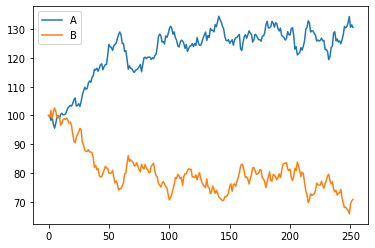

In [62]:
#############################
##풀이과정을 여기에 쓰세요 ##
#############################
r , S1, S2 = 0.05, 100, 100
T , deltaT = 1 , 1/252
sig1, sig2, corr = 0.2, 0.3 , -0.65
corr = np.array([[1, corr],[corr,1]])

timeline = np.arange(deltaT, T+deltaT, deltaT)
e = np.random.multivariate_normal([0,0], corr, size = 252)
cum_e = e.cumsum(0)
cum_e1, cum_e2 = cum_e[:,0], cum_e[:,1]
cum_drift1 = (r-0.5*sig1**2)*timeline
cum_drift2 = (r-0.5*sig2**2)*timeline
cum_diffusion1 = sig1*np.sqrt(deltaT)*cum_e1
cum_diffusion2 = sig2*np.sqrt(deltaT)*cum_e2
S1_t = S1 * np.exp(cum_drift1+cum_diffusion1)
S2_t = S2 * np.exp(cum_drift2+cum_diffusion2)
S1_path = np.concatenate([[S1],S1_t])
S2_path = np.concatenate([[S2],S2_t])
A = pd.DataFrame(S1_path, columns = ['A'])
B = pd.DataFrame(S2_path, columns = ['B'])
AB = pd.concat([A,B], axis = 1)
AB.plot()
plt.plot()

#############################

 ##### 1-2

In [63]:
#############################
##풀이과정을 여기에 쓰세요 ##
#############################
initial_money = 500
AB_money = initial_money * np.array([0.3, 0.7]).reshape(1,-1)
number_of_stock = AB_money / np.array(AB.iloc[0]).reshape(1,-1)
Port = number_of_stock * AB
Port['Total_Value'] = Port.sum(1)
Ret_Port = Port['Total_Value'].pct_change().iloc[1:]

VaR95 = Ret_Port.quantile(0.05)
ES95 = Ret_Port[Ret_Port<VaR95].mean()
print('VaR(95%) = ',VaR95,'\nES(95%) = ',ES95)
#############################

VaR(95%) =  -0.015138748317792883 
ES(95%) =  -0.01848495703781842
